# Animation!

Let's try animation

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

plt.rcParams['animation.ffmpeg_path'] = '/pool0/data/steinadi/.conda/envs/sedi/bin/ffmpeg'

import xarray as xr

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Going to first try to animate using html5 embedding ...

Follow a tutorial ... (plenty out there, this one explains what's happening as you go)

https://www.youtube.com/watch?v=GtZxk8Wa3Jw

In [2]:
output = plt.plot([])
plt.close()
print(output)

In [3]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [4]:
plt.rcParams["animation.html"] = "html5"

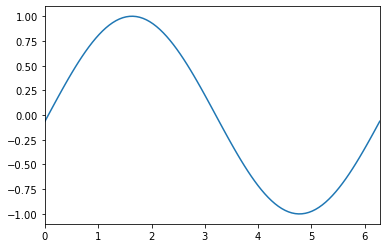

In [5]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()

lines = plt.plot([])
line = lines[0]
# other setup (static things)
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)

def animate(frame):
    # update plot
    y = np.sin(x + 2*np.pi * frame/100)
    line.set_data((x, y))

# interval is in milisec, 20 --> 50 fps
anim = FuncAnimation(fig, animate, frames=100, interval=30)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#plt.show()

Okay, so that gives me some issues ... here is a solution using javascript instead:     
https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

after some more searching, I found ... apparently VS Code stripes out ffmpeg and other video support from their release builds and will not change it ... (https://github.com/microsoft/vscode/issues/32540), which I found from  a different thread that was having the same issues as me (https://github.com/microsoft/vscode-jupyter/issues/1912) ... lovely. That explains at least why it's an IDE issue.

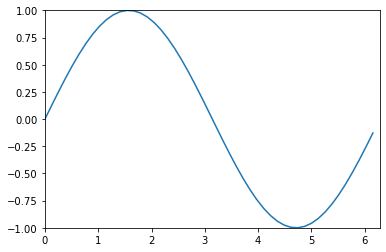

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=100)

from IPython.display import HTML
HTML(ani.to_jshtml())

Now we get experimental and try to adapt ... (in progress)

In [8]:
# Pick your path ...
fdsi = xr.open_dataset('../../data/drought_measures/fdsi/fdsi.nc')

# make sure things loaded fine
fdsi

<xarray.Dataset>
Dimensions:  (lat: 585, lon: 1386, time: 41, year: 41)
Coordinates:
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * time     (time) object 1980-01-14 00:00:00 ... 2020-01-14 00:00:00
  * year     (year) int32 1980 1981 1982 1983 1984 ... 2016 2017 2018 2019 2020
Data variables:
    fdsi     (year, lat, lon) float32 ...
Attributes: (12/22)
    geospatial_bounds_crs:           EPSG:4326
    Conventions:                     CF-1.6
    geospatial_bounds:               POLYGON((-124.7666666333333 49.400000000...
    geospatial_lat_min:              25.066666666666666
    geospatial_lat_max:              49.40000000000000
    geospatial_lon_min:              -124.7666666333333
    ...                              ...
    note3:                           Data in slices after last_permanent_slic...
    note4:                           Data in slices after last_provisional_sl...
    note5:                           Days correspond approximately to calenda...
    history:                         Fri Mar 12 19:16:03 2021: ncks --mk_rec_...
    NCO:                             4.7.2
    DODS_EXTRA.Unlimited_Dimension:  time

In [9]:
from IPython.display import HTML

In [10]:
fdsi_da = fdsi['fdsi']

In [11]:
len(fdsi['year'])

41

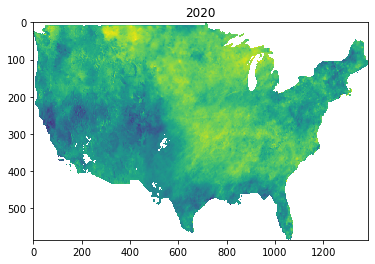

In [12]:
# method from Andrew Bennett

fig, ax = plt.subplots()

ax.invert_yaxis()

def animate(i):
    ax.set_title(fdsi['year'].values[i])
    return (plt.pcolormesh(fdsi['fdsi'].isel(year=i)),)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=41, blit=True)
HTML(ani.to_html5_video())

Let's fix those plotting parameters and model it off of the Quadmesh's settings:

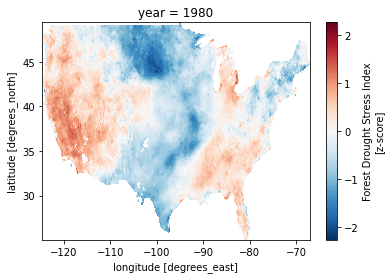

In [13]:
fdsi['fdsi'].isel(year=0).plot()

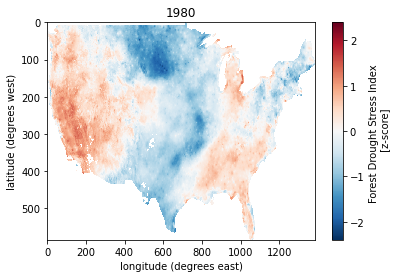

In [14]:
fig, ax = plt.subplots()

ax.invert_yaxis()
cmap = mpl.cm.get_cmap('RdBu_r')

ax.set_xlabel('longitude (degrees east)')
ax.set_ylabel('latitude (degrees west)')

extreme = 2.4
i = 0
ax.set_title(fdsi['year'].values[i])
ax.pcolormesh(fdsi['fdsi'].isel(year=i).values, vmin=-1*extreme, vmax=extreme, cmap=cmap)

norm = mpl.colors.Normalize(vmin=-extreme, vmax=extreme)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Forest Drought Stress Index \n [z-score]')

Now to put it all together

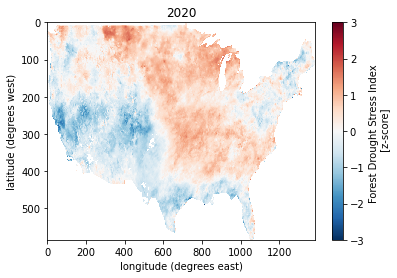

In [15]:
# method adapted from Andrew Bennett

fig, ax = plt.subplots()

ax.invert_yaxis()
cmap = mpl.cm.get_cmap('RdBu_r')

ax.set_xlabel('longitude (degrees east)')
ax.set_ylabel('latitude (degrees west)')

extreme = 3

norm = mpl.colors.Normalize(vmin=-extreme, vmax=extreme)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Forest Drought Stress Index \n [z-score]')

def animate(i):
    ax.set_title(fdsi['year'].values[i])
    return (plt.pcolormesh(fdsi['fdsi'].isel(year=i), vmin=-1*extreme, vmax=extreme, cmap=cmap),)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=41, blit=True)
HTML(ani.to_html5_video())

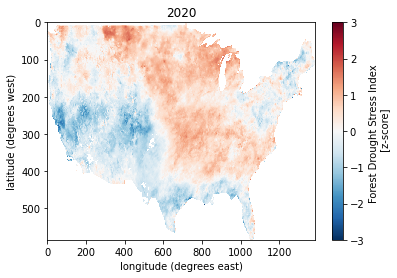

In [16]:
# method adapted from Andrew Bennett

fig, ax = plt.subplots()

ax.invert_yaxis()
cmap = mpl.cm.get_cmap('RdBu_r')

ax.set_xlabel('longitude (degrees east)')
ax.set_ylabel('latitude (degrees west)')

extreme = 3

norm = mpl.colors.Normalize(vmin=-extreme, vmax=extreme)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Forest Drought Stress Index \n [z-score]')

def animate(i):
    ax.set_title(fdsi['year'].values[i])
    return (plt.pcolormesh(fdsi['fdsi'].isel(year=i), vmin=-1*extreme, vmax=extreme, cmap=cmap),)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=41, blit=True, interval=200)
HTML(ani.to_html5_video())